### Import Necessary Module and Set Path 

In [13]:
import sqlite3 as lite
import os
import sys
import collections
import matplotlib.pyplot as plt
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [14]:
import analysis as an

## Run Cyclus Input file

### The output file should be named 
         
          eu_future.sqlite

In [15]:
# dictionary to hold data for plotting:
astrid_fuel_from_uox = {}
uox_reprocessed = {}
avg_reprocess_capacity = {}
max_reprocess_capacity = {}
uox_avg_reprocess_capacity = {}
uox_max_reprocess_capacity = {}

In [5]:
! cyclus 108br.xml -o 108br.sqlite
! cyclus 111br.xml -o 111br.sqlite
! cyclus 115br.xml -o 115br.sqlite
! cyclus 118br.xml -o 118br.sqlite
! cyclus 5yr_108.xml -o 5yr_108.sqlite
! cyclus 10yr_108.xml -o 10yr_108.sqlite
! cyclus 20yr_108.xml -o 20yr_108.sqlite

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Further Experimental Warnings will be suppressed.

Status: Cyclus run successful!
Output location: 5yr_108.sqlite
Simulation ID: 5334a3d7-a1b5-40f0-919a-4e0af5cb0eb7
              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       

Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: The Storage Facility is experimental.
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlSellPolicy is experimental and its API may be subject to change
Experimental Warning: the Mixer archetype is experimental
Experimental Warning: MatlBuyPolicy is experimental and its API may be subject to change
Experimental Warning: MatlSellPolicy is experimental and its API may be subject 

In [8]:
cur_108br = an.cursor('108br.sqlite')
cur_111br = an.cursor('111br.sqlite')
cur_115br = an.cursor('115br.sqlite')
cur_118br = an.cursor('118br.sqlite')


In [9]:
# Pu Composition in Spent Fuels:
pu_frac_spent_uox = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "uox_used_fuel_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
obr = cur_108br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
fivebr = cur_115br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.15" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
onebr = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.11" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
eightbr = cur_118br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "1.18" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
br_dict = {1.08: obr[0], 1.11: onebr[0], 1.15: fivebr[0], 1.18: eightbr[0]}
for key, val in br_dict.items():
    print(key, val)

1.08 0.27431405161777184
1.11 0.2927282490909536
1.15 0.3012337276327513
1.18 0.310254559737049


In [10]:
import numpy as np

# generate breeding ratio plots

total_monthly_rep_dict = {}
cum_lwr_unf_rep_dict = {}

file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                                 True, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_timeseries['astrid_fuel_legacy']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x * 0.22 / used_comp) for x in fuel_timeseries['astrid_fuel_new']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], False, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


In [11]:
import numpy as np

# generate breeding ratio plots

total_monthly_rep_dict = {}
cum_monthly_rep_dict = {}
cum_lwr_unf_rep_dict = {}


file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in fuel_timeseries['uox_Pu']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x / used_comp) for x in fuel_timeseries['astrid_Pu']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, True)
    cum_rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['uox_Pu']]
    cum_rep_for_astrid = [(x / used_comp) for x in cum_fuel_timeseries['astrid_Pu']]
    cum_monthly_rep_dict[name] = [x+y for x,y in zip(cum_rep_for_uox, cum_rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], True, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


108br 159804.05640306242
111br 156832.616176762
115br 155603.3338280241
118br 154318.6624362421


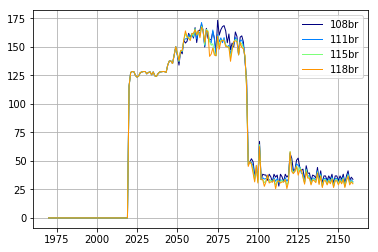

In [16]:
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in total_monthly_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


108br 159804.05640306242
111br 156832.616176762
115br 155603.3338280241
118br 154318.6624362421


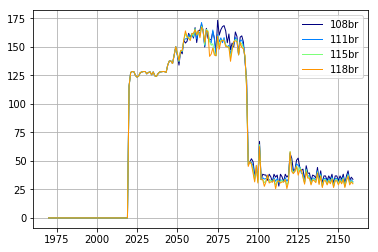

In [17]:
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in total_monthly_rep_dict.items():
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    print(key, sum(val))
plt.legend()
plt.grid()
plt.show()


Percent reduction in total LWR UNF reprocessed
108br 0.0
111br 4.952380952380963
115br 8.000000000000018
118br 9.714285714285719


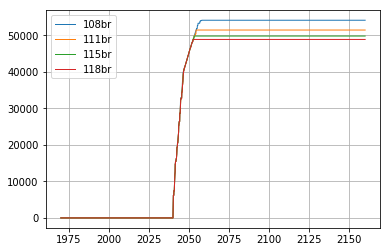

In [18]:
# cumulative LWR UNF reprocessed
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
print('Percent reduction in total LWR UNF reprocessed')
for key, val in cum_lwr_unf_rep_dict.items():
    plt.plot(years, val, label=key, linewidth=1)
    print(key, (1- max(val)/max(cum_lwr_unf_rep_dict['108br'])) * 100 )
plt.legend()
plt.grid()
plt.show()


In [19]:
z  =' xyz'
z.find('x')

1

In [20]:
# generate lifetime extension plots
file_list = ['108br.sqlite', '5yr_108.sqlite', '10yr_108.sqlite', '20yr_108.sqlite']


uox_rep_dict = {}
tot_rep_dict = {}

for file in file_list:
    if '_' in file:
        indx = file.find('_')
        name = file[:indx]
    else:
        name = 'base'
    
    print(name)
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_Pu', 'uox_Pu'],
                                                 False, False)
    # lwr UNF reprocessing
    rep_for_uox = [(x / pu_frac_spent_uox[0]) for x in fuel_timeseries['uox_Pu']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x / used_comp) for x in fuel_timeseries['astrid_Pu']]
    
    uox_rep_dict[name] = rep_for_uox
    tot_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
   

base
5yr
10yr
20yr


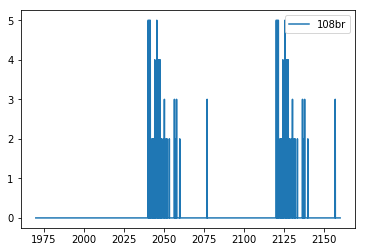

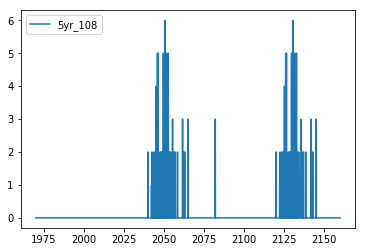

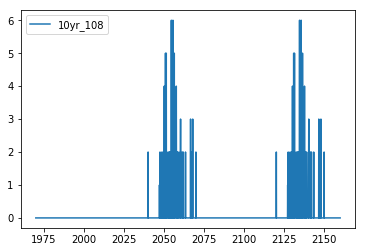

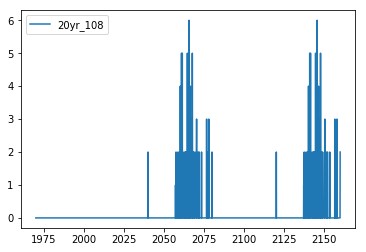

In [45]:
for file in file_list:
    cursor = an.cursor(file)
    sfr_enter = cursor.execute('select entertime from agententry where prototype = "astrid"').fetchall()
    z = []
    init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
    for i in range(duration):
        count = 0
        for k in sfr_enter:
            if k['entertime'] == i:
                count += 1
        z.append(count)
    plt.plot(init_year + timestep/12, z, label=file.replace('.sqlite', ''))
    plt.legend()
    plt.show()
    
    

base 108975.21435953208 ( 0.0 )
avg 120.14907867644126
5yr 111169.58945038513 ( 2.013646042129677 )
avg 120.31340849608783
10yr 115933.29729687479 ( 6.385014223864278 )
avg 120.38763997598625
20yr 125968.98178823644 ( 15.594158294232265 )
avg 121.12402095022738


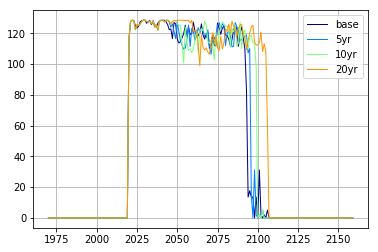

In [39]:
# just the uox
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in uox_rep_dict.items():
    # take yearly average
    if 'base' in key:
        base_val = sum(val)
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    err = (sum(val) - base_val) / base_val * 100
    print(key, sum(val), '(', err, ')')
    val = np.array(val)
    print('avg',  val[val.nonzero()].mean())
plt.legend()
plt.grid()
plt.savefig('ext_uox_rep.png')
plt.show()



base 153915.94177967525 ( 0.0 )
5yr 154440.2106182997 ( 0.3406202324220005 )
10yr 156586.2341971077 ( 1.7349030818749525 )
20yr 163076.39761399402 ( 5.951596519762461 )


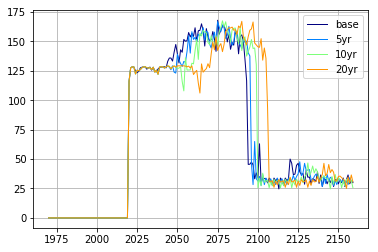

In [40]:
# total rep
init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
years = init_year + timestep/12
from matplotlib import cm
color = 0.0
for key, val in tot_rep_dict.items():
    if 'base' in key:
        base_val = sum(val)
    # take yearly average
    new_list = []
    for i in range(len(val) // 12):
        new_list.append(sum(val[i*12:(i+1)*12]))
    rep = np.array(new_list) / 12
    years = np.arange(init_year, init_year+len(new_list))
    plt.plot(years, rep, label=key, linewidth=1, color=cm.jet(color))
    color += 0.25
    err = (sum(val) - base_val) / base_val * 100
    print(key, sum(val), '(', err, ')')
plt.legend()
plt.grid()
plt.savefig('ext_tot_rep.png')
plt.show()
